In [1]:
import sys
from pathlib import Path

from Data_Generation_Functions import *


Cython acceleration could not be loaded.
Falling back on Python equivalents... 
Cython acceleration could not be loaded. 
Falling back on Python equivalents...

Computing g2: 100%|██████████| 201/201 [00:00<00:00, 3230096.18config/s]


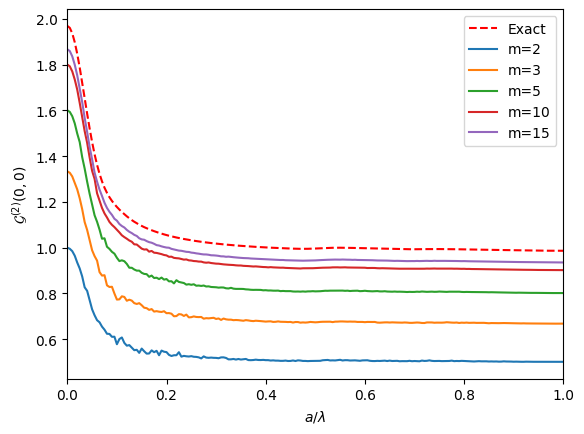

In [3]:
#Plot Convergance of MWise Approximation with Sample Size
N = 8
Dim = 2
m_set = [2, 3, 5, 10, 15]
Num_Samples = 10000
a_set = np.linspace(0, 1, 201)

#Plot Exact Solution
Samples_Exact = Sampling_Methods(SOCF_Type.G2, Approx.EXACT, N, Dim, Num_Samples=Num_Samples)
Filename_Exact = Samples_Exact.Generate_Inverted_Array_Data(a_set)
Data = Read_Write_Class.Read_From_File(Filename_Exact)
Exact_a, Exact_g2 = map(list, zip(*Data))
Exact_a, Exact_g2 = Read_Write_Class.Sort_Both_Lists(Exact_a, Exact_g2) # Sort both lists based on Exact_a values
plt.plot(Exact_a, Exact_g2, label="Exact", color="red", linestyle='dashed')

#Plot M-Wise Approximations
for m in m_set:
    Samples_MWise = Sampling_Methods(SOCF_Type.G2, Approx.MWISE, N, Dim, m, Num_Samples=Num_Samples)
    Filename_m = Samples_MWise.Generate_Inverted_Array_Data(a_set)
    Data = Read_Write_Class.Read_From_File(Filename_m)

    MWise_a, MWise_g2 = map(list, zip(*Data))
    MWise_a, MWise_g2 = Read_Write_Class.Sort_Both_Lists(MWise_a, MWise_g2) # Sort both lists based on MWise_a values
    plt.plot(MWise_a, MWise_g2, label=f"m={m}")

plt.xlabel('$a/\lambda$')
plt.ylabel('$\mathcal{G}^{(2)}(0,0)$')
plt.xlim([0, 1])
plt.legend()
plt.show()
